In [14]:
import pandas as pd

In [15]:
data = pd.read_csv("male_female.csv")

In [16]:
data.head()

,age,salary per year,category
0,69,4.39,female
1,69,4.21,female
2,65,4.09,female
3,72,5.85,male
4,67,4.70,female


In [17]:
data.shape

(41, 3)

In [18]:
from sklearn.model_selection import train_test_split
training_set, test_set = train_test_split(data, test_size = 0.2, random_state = 1)

In [19]:
X_train = training_set.iloc[:,0:2].values
Y_train = training_set.iloc[:,2].values
X_test = test_set.iloc[:,0:2].values
Y_test = test_set.iloc[:,2].values

In [20]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf',gamma=0.6, random_state = 1)
classifier.fit(X_train,Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.6, kernel='rbf',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False)

In [21]:
Y_pred = classifier.predict(X_test)

In [22]:
test_set["Predictions"] = Y_pred
test_set

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,age,salary per year,category,Predictions
3,72,5.85,male,male
2,65,4.09,female,female
23,68,4.08,female,female
38,70,5.59,female,male
17,75,5.25,male,male
28,74,5.25,male,male
19,74,5.50,male,male
34,68,4.83,female,female
30,73,5.78,male,male


In [23]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
cm = confusion_matrix(Y_test,Y_pred)
print(cm)
print(metrics.classification_report(Y_test,Y_pred))
accuracy = float(cm.diagonal().sum())/len(Y_test)

[[3 1]
 [0 5]]
              precision    recall  f1-score   support

      female       1.00      0.75      0.86         4
        male       0.83      1.00      0.91         5

   micro avg       0.89      0.89      0.89         9
   macro avg       0.92      0.88      0.88         9
weighted avg       0.91      0.89      0.89         9



In [24]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_pred)
print("\nAccuracy Of SVM For The Given Dataset : ", accuracy)


Accuracy Of SVM For The Given Dataset :  0.8888888888888888


In [25]:
#Visualizing the classifier
#Before we visualize we might need to encode
#We can achieve that using the label encoder.

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y_train = le.fit_transform(Y_train)

In [26]:

from sklearn.svm import SVC
classifier = SVC(kernel='linear', random_state = 1)
classifier.fit(X_train,Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=1,
  shrinking=True, tol=0.001, verbose=False)

In [27]:
Y_pred = classifier.predict(X_test)


In [28]:
test_set["Predictions"] = Y_pred
test_set


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,age,salary per year,category,Predictions
3,72,5.85,male,1
2,65,4.09,female,0
23,68,4.08,female,0
38,70,5.59,female,1
17,75,5.25,male,1
28,74,5.25,male,1
19,74,5.50,male,1
34,68,4.83,female,0
30,73,5.78,male,1


In [29]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


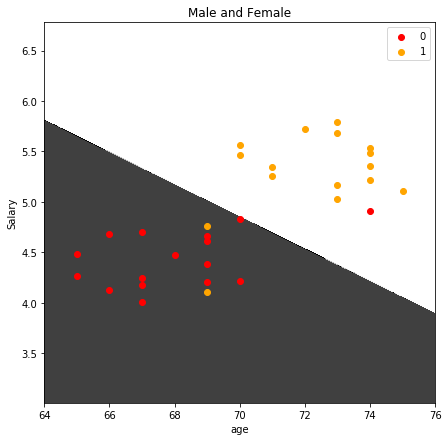

In [30]:
#visualizing the classifier

plt.figure(figsize = (7,7))
X_set, y_set = X_train, Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01), np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('black', 'white')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'orange'))(i), label = j)
plt.title('Male and Female')
plt.xlabel('age')
plt.ylabel('Salary')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


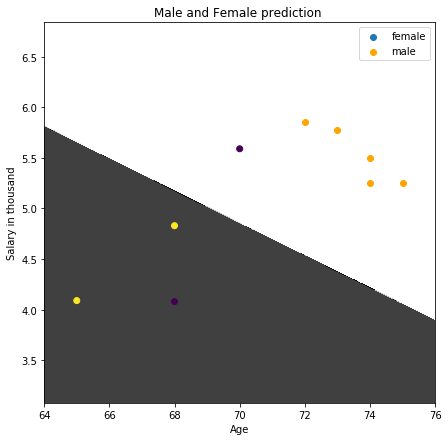

In [33]:
#visualizing the predictions
plt.figure(figsize = (7,7))
X_set, y_set = X_test, Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),alpha = 0.75, cmap = ListedColormap(('black', 'white')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],c = ListedColormap(('red', 'orange'))(i), label = j)
plt.title('Male and Female prediction ')
plt.xlabel('Age')
plt.ylabel('Salary in Lakh')
plt.legend()
plt.show()